# Day9. 심화과제

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [5]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 104kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=1ec65bb85b2a17468c4bb944085997067130124a8e246135af604417066093c9
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
import cv2, os
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt
image_path = "/gdrive/My Drive/colab/image.jpg"
image = fr.load_image_file(image_path)
face_locations = fr.face_locations(image)

In [0]:
for (top, right, bottom, left) in face_locations:
  cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 3)

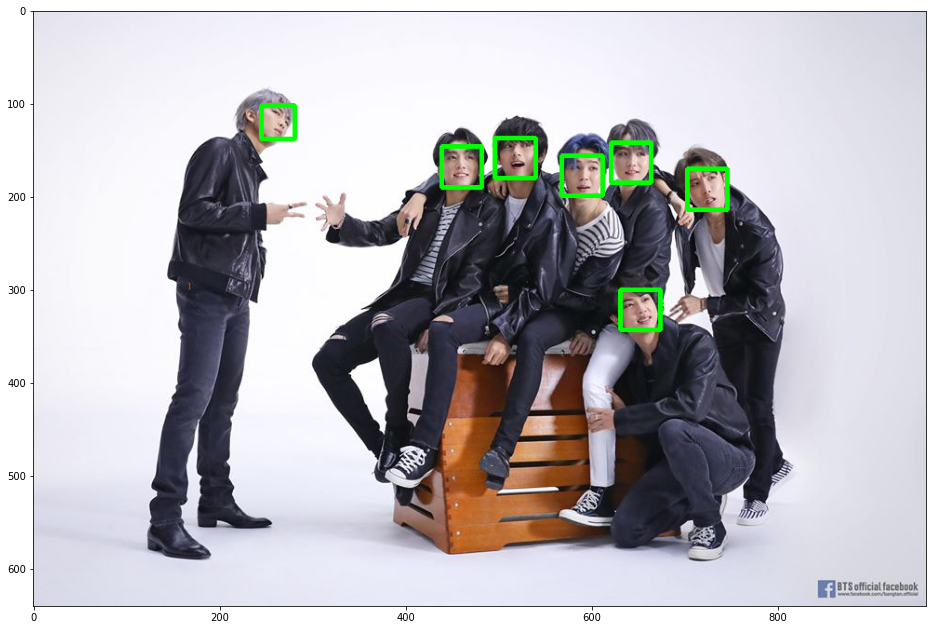

In [0]:
plt.rcParams["figure.figsize"] = (16, 16)
plt.imshow(image)
plt.show()


Req-7. 명세서 9p의 내용을 따라 Face Detection을 하는 코드를 작성하고 실행해 보세요.

Req-8. 명세서 12p를 참고하여 4명의 인물사진에서 얼굴을 감지하여 인코딩을 한 후 새로운 인물사진 unknown을 입력 받아 기존 4명의 얼굴 중 동일인을 찾는 코드를 구현 및 실행해 보세요.


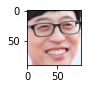

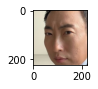

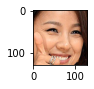

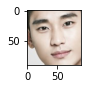

In [10]:
plt.rcParams["figure.figsize"] = (1, 1)
known_person_list = []
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/person1.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/person2.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/person3.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/person4.jpg"))

known_face_list = []
for person in known_person_list:
  top, right, bottom, left = fr.face_locations(person)[0]
  face_image = person[top:bottom, left:right]
  known_face_list.append(face_image)

for face in known_face_list:
  plt.imshow(face)
  plt.show()
  

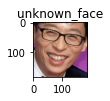

In [11]:
unknown_person = fr.load_image_file("/gdrive/My Drive/colab/unknown.jpg")

top, right, bottom, left = fr.face_locations(unknown_person)[0]
unknown_face = unknown_person[top:bottom, left:right]
plt.title("unknown_face")
plt.imshow(unknown_face)
plt.show()


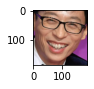

In [12]:
enc_unknown_face = fr.face_encodings(unknown_face)
plt.imshow(unknown_face)
plt.show()

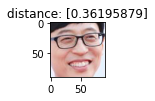

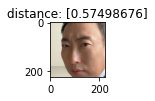

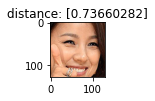

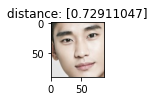

In [13]:
for face in known_face_list:
  enc_known_face = fr.face_encodings(face)
  distance = fr.face_distance(enc_known_face, enc_unknown_face[0])
  plt.title("distance: " + str(distance))
  plt.imshow(face)
  plt.show()